#Model Building

In [45]:
import numpy as np # used for working with arrays
import matplotlib.pyplot as plt
import pandas as pd # used for data science/data analysis and machine learning tasks

import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model # Functional API
# We may also use sequential API
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras


1. Build base model which is inceptionV3
2. Outputs of InceptionV3 will be added to flatten layer and then back to neural network

In [46]:
base_model=InceptionV3(input_shape=(224,224,3),include_top=False)

In [47]:
# We wont train any layer
for layer in base_model.layers:
  layer.trainable=False

Whatever the output of base model we take that and add it to our actual model

In [48]:
# With the help of Sigmoid activation function, we are able to reduce the loss during the time of training because it eliminates the gradient problem in machine learning model while training.
from keras.backend import sigmoid
X=Flatten()(base_model.output) # input
X=Dense(units=2, activation='sigmoid')(X) # No. of classes 2 so units also 2
# Final Model
model=Model(base_model.input,X)
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [49]:
# Preprocess data using data generator
train_datagen=ImageDataGenerator(featurewise_center=True, 
                                 rotation_range=0.4, 
                                 width_shift_range=0.3,
                                 horizontal_flip=True, 
                                 preprocessing_function=preprocess_input, 
                                 zoom_range=0.1,
                                 shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory='/content/Tree_NoTree_Dataset/Tree_NoTree_Dataset', 
                                             target_size=(224,224), 
                                             batch_size=64)

Found 1000 images belonging to 2 classes.


In [50]:
# Check index value
train_data.class_indices

{'No_Tree-samples': 0, 'Tree-samples': 1}

In [51]:
t_img,label=train_data.next()

In [52]:
t_img.shape

(64, 224, 224, 3)

In [53]:
t_img

array([[[[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        ...,

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.]],

        [[-1., -1., -1.],
         [-1., -1., -1.],
         [-1., -1., -1.],
         ...,
         [-1., -1., -1.],
        

In [54]:
def plotImages(img_arr,label):
  """
  input: image array
  output: plot images
  """
  for idx,img in enumerate(img_arr): # idx=index
    if idx<=10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

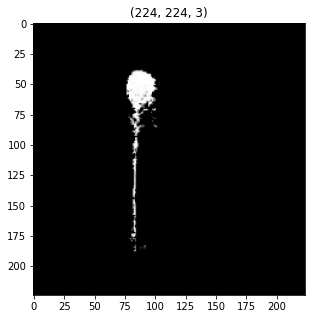

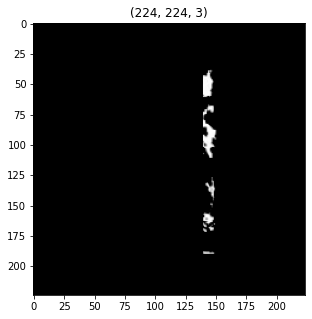

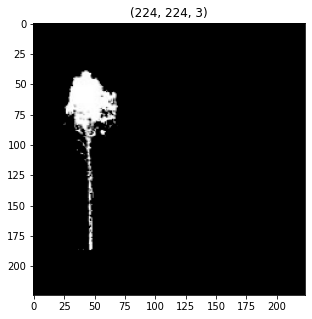

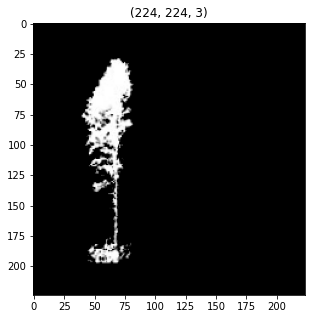

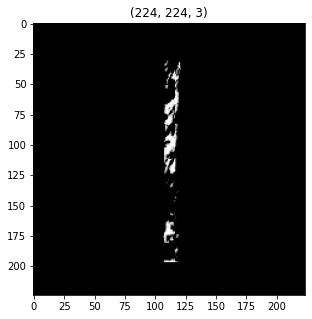

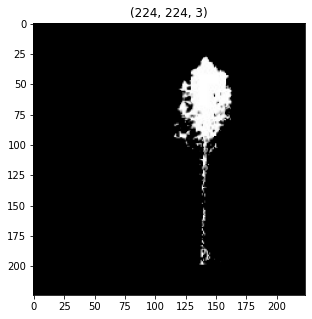

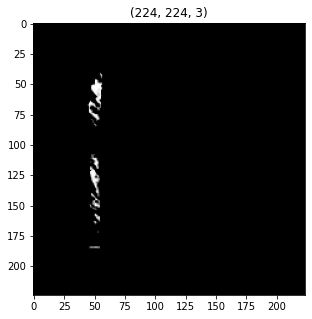

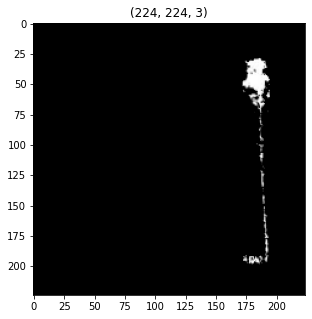

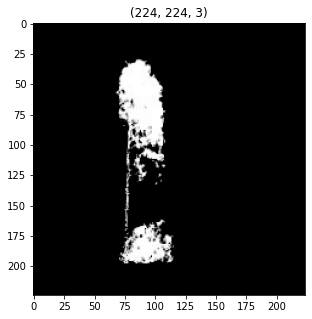

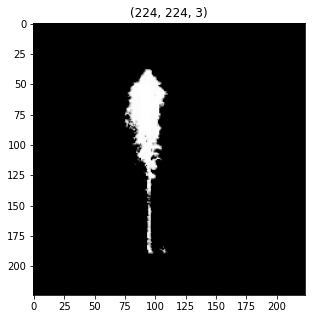

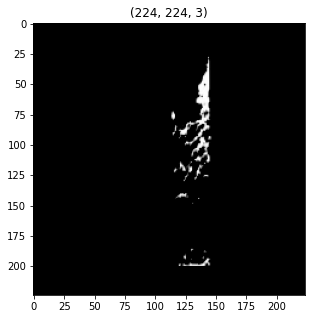

In [55]:
plotImages(t_img,label)

# Add model checkpoint

In [56]:

from keras.callbacks import ModelCheckpoint,EarlyStopping

mc=ModelCheckpoint(filepath="./best_model.h5", # Where best file will be saved
                                              # best model would go here
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)

es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5, # No of time it should wait if accuracy doesnt increase
                 verbose=1)

cb=[mc,es]

If we dont do early stop model might overfit

# Train model

In [57]:
his=model.fit_generator(train_data, 
                        steps_per_epoch=10,
                        epochs=30, 
                        callbacks=cb)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.4014 - accuracy: 0.7760
Epoch 1: accuracy improved from -inf to 0.77597, saving model to ./best_model.h5
10/10 [==============================] - 13s 792ms/step - loss: 1.4014 - accuracy: 0.7760
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.9562
Epoch 2: accuracy improved from 0.77597 to 0.95617, saving model to ./best_model.h5
10/10 [==============================] - 7s 726ms/step - loss: 0.2512 - accuracy: 0.9562
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9859
Epoch 3: accuracy improved from 0.95617 to 0.98594, saving model to ./best_model.h5
10/10 [==============================] - 8s 751ms/step - loss: 0.0380 - accuracy: 0.9859
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9838
Epoch 4: accuracy did not improve from 0.98594
10/10 [==============================] - 8s 751ms/step - los

In [58]:
from keras.models import load_model
model=load_model("/content/best_model.h5") # load best model

In [59]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Loss vs Accuracy')

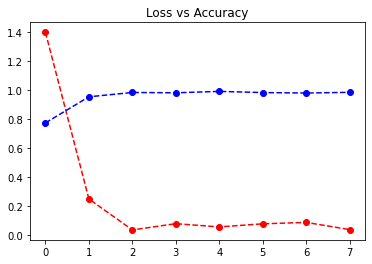

In [60]:
plt.plot(h['loss'],'go--',c="red")
plt.plot(h['accuracy'],'go--',c="blue")

plt.title("Loss vs Accuracy")

In [61]:
def prediction(path):

  img=load_img(path,target_size=(224,224)) # load image

  i=img_to_array(img) # convert image to array 

  i=preprocess_input(i) 

  input_arr=np.array([i]) # increase dimensions
  print(input_arr.shape)  


  pred=np.argmax(model.predict(input_arr))

  if pred==0:
    print("The image is not of a Tree")
  else:
    print("The image is of a Tree")

  plt.imshow(input_arr[0])
  plt.title("input image")
  plt.axis=False
  plt.show()
  print(pred)



(1, 224, 224, 3)


The image is not of a Tree


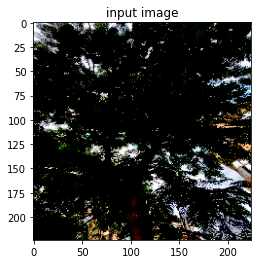

0


In [62]:
path='/content/drive/MyDrive/WhatsApp Image 2022-09-21 at 15.49.35.jpg'
prediction(path)